In [19]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import os
import re

In [20]:
def load_data(csv_path):
    return pd.read_csv(csv_path)

In [21]:
data = load_data('/Users/ibrahimshaarawy/Desktop/research/data/dataset_2019.csv')

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24794 entries, 0 to 24793
Data columns (total 32 columns):
id           24794 non-null int64
Project      24794 non-null object
LongName     24794 non-null object
Name         24794 non-null object
LCOM5        24794 non-null int64
NL           24794 non-null int64
NLE          24794 non-null int64
WMC          24794 non-null int64
CBO          24794 non-null int64
CBOI         24794 non-null int64
NII          24794 non-null int64
NOI          24794 non-null int64
RFC          24794 non-null int64
AD           24794 non-null float64
CD           24794 non-null float64
TCD          24794 non-null float64
CLOC         24794 non-null int64
TCLOC        24794 non-null int64
DLOC         24794 non-null int64
PDA          24794 non-null int64
DIT          24794 non-null int64
LLOC         24794 non-null int64
LOC          24794 non-null int64
TLOC         24794 non-null int64
NG           24794 non-null int64
TLLOC        24794 non-null int6

In [24]:
data.describe()

,id,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,...,LOC,TLOC,NG,TLLOC,TNA,TNG,TNM,TNOS,TNPM,ReuseRate
count,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,...,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000,24794.000000
mean,12396.500000,2.347705,1.192587,1.046019,15.659111,4.998104,3.216383,4.418246,5.759861,13.800637,...,111.178027,123.494757,4.427563,81.937203,5.915504,4.965234,25.863919,33.820440,19.757562,4.283214
std,7157.555623,5.187990,1.721310,1.335027,36.106116,7.841163,12.597022,20.675423,14.695094,24.994035,...,240.089906,273.051045,12.899818,176.181894,14.807522,14.046488,49.305967,88.554174,38.630555,41.813545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6198.250000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,17.000000,17.000000,0.000000,13.250000,1.000000,0.000000,3.000000,3.000000,2.000000,0.000000
50%,12396.500000,1.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,2.000000,7.000000,...,41.000000,44.000000,1.000000,31.000000,2.000000,1.000000,9.000000,10.000000,6.000000,0.000000
75%,18594.750000,2.000000,2.000000,2.000000,16.000000,6.000000,2.000000,2.000000,5.000000,15.000000,...,107.000000,118.000000,4.000000,79.000000,6.000000,4.000000,25.000000,29.000000,18.000000,1.000000
max,24793.000000,169.000000,24.000000,10.000000,1057.000000,235.000000,551.000000,1368.000000,504.000000,799.000000,...,9300.000000,9300.000000,198.000000,7303.000000,714.000000,224.000000,1742.000000,4063.000000,1456.000000,3964.000000


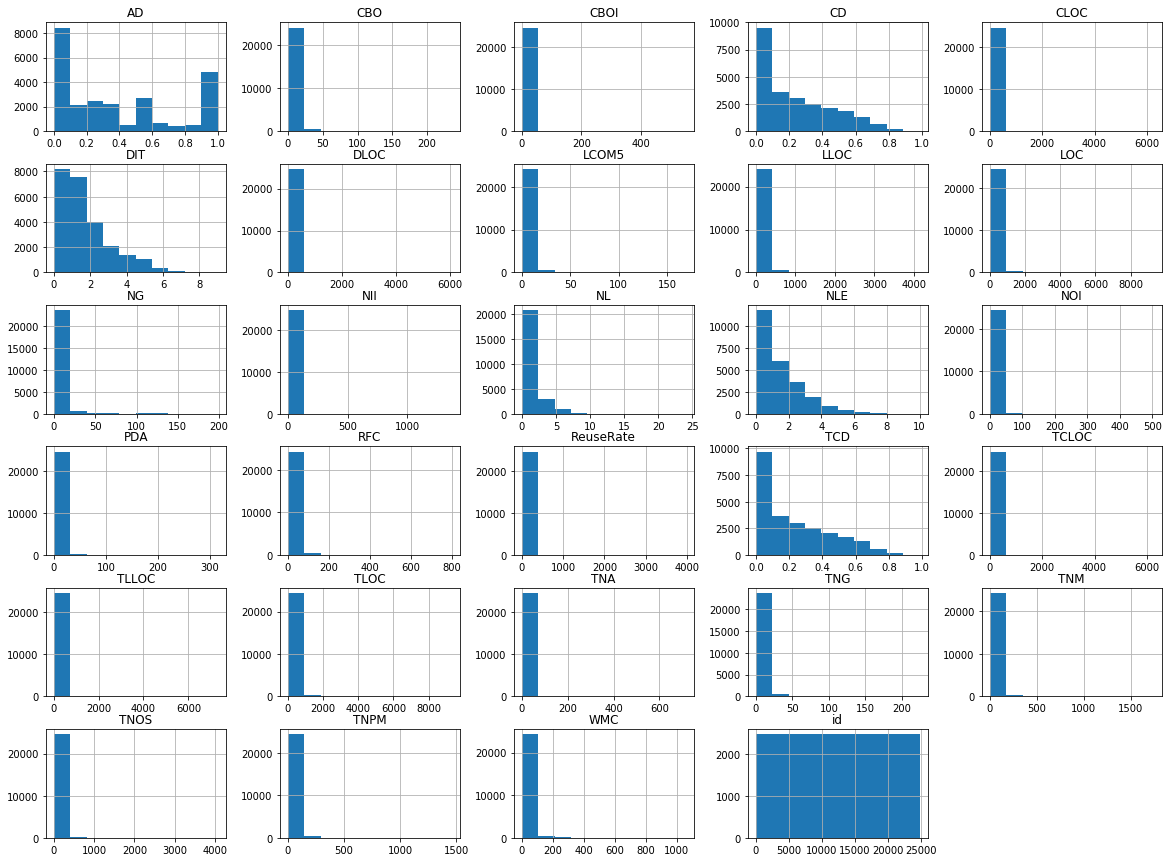

In [25]:
%matplotlib inline   
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(20,15))
plt.show()

In [26]:
corr_matrix = data.corr()

In [27]:
corr_matrix["ReuseRate"].sort_values(ascending=False)

ReuseRate    1.000000
CBOI         0.219900
PDA          0.192324
DLOC         0.177264
TCLOC        0.169921
CLOC         0.169438
NII          0.154022
TLOC         0.128110
LOC          0.127535
CD           0.117808
TCD          0.114076
AD           0.110078
RFC          0.105331
WMC          0.096816
TLLOC        0.084689
LLOC         0.078485
TNM          0.076548
TNOS         0.075235
TNPM         0.072914
LCOM5        0.059620
NLE          0.056822
CBO          0.054139
NOI          0.052187
NL           0.047422
TNA          0.039704
TNG          0.036277
NG           0.033191
id          -0.022487
DIT         -0.027721
Name: ReuseRate, dtype: float64

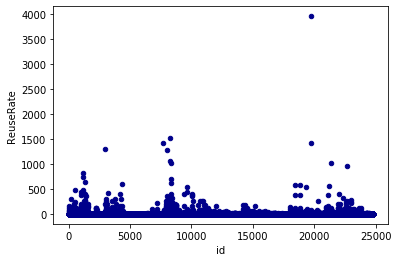

In [28]:
ax1 = data.plot.scatter(x='id', y='ReuseRate', c = 'DarkBlue')

In [29]:
from scipy.stats import zscore

In [30]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
#data[numeric_cols].apply(zscore)


In [31]:
print(numeric_cols)

Index(['id', 'LCOM5', 'NL', 'NLE', 'WMC', 'CBO', 'CBOI', 'NII', 'NOI', 'RFC',
       'AD', 'CD', 'TCD', 'CLOC', 'TCLOC', 'DLOC', 'PDA', 'DIT', 'LLOC', 'LOC',
       'TLOC', 'NG', 'TLLOC', 'TNA', 'TNG', 'TNM', 'TNOS', 'TNPM',
       'ReuseRate'],
      dtype='object')


In [36]:
z_scores = zscore(data['ReuseRate'])

In [37]:
abs_z_scores = np.abs(z_scores)

In [39]:
for score in abs_z_scores:
    print(score)

0.04105896609327433
0.006773388617839887
0.04105896609327433
2.815335539337899
1.8586884451156145
3.8915635203379684
0.3280530943599596
0.10243809804006831
0.030689565973396993
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.5911310452710878
0.10243809804006831
0.04105896609327433
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.0785219206845112
0.0785219206845112
1.356448720648915
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.0546057433289541
0.0785219206845112
0.10243809804006831
0.030689565973396993
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.030689565973396993
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.006773388617839887
0.10243809804006831
0.006773388617839887
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.017142788737

0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831


0.0785219206845112
0.0546057433289541
0.0785219206845112
0.0785219206845112
0.5432986905599736
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.030689565973396993
0.10243809804006831
0.030689565973396993
0.030689565973396993
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.0546057433289541
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
1.6912752036267147
0.16063985287105986
0.030689565973396993
0.35196927171551673
0.16063985287105986
0.10243809804006831
0.9977060603155585
1.8347722677600573
0.0546057433289541
0.0546057433289541
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.078521920684511

0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831


0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.04105896609327433
0.0546057433289541
0.13672367551550274
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.20847220758217408
0.3998016264266309
0.11280749815994565
0.08889132080438854
0.10243809804006831
0.04105896609327433
0.030689565973396993
0.5672148679155307
2.2174311054489713
0.10243809804006831
0.0785219206845112
0.6150472226266449
0.01714278873771722
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.1024

0.6150472226266449
0.10243809804006831
0.030689565973396993
0.01714278873771722
0.08889132080438854
0.2563045622932883
0.11280749815994565
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.01714278873771722
0.7346281094044305
3.3893237958712694
0.13672367551550274
0.10243809804006831
4.058976761826869
0.10243809804006831
0.0546057433289541
0.06497514344883143
0.10243809804006831
0.10243809804006831
0.10243809804006831
4.058976761826869
4.226390003315768
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.30413691700440254
0.10243809804006831
3.6284855694268403
1.739107558337829
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.1024380980400

0.10243809804006831
0.2323883849377312
0.44763398113774516
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.04105896609327433
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.006773388617839887
0

0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.006773388617839887
0.030689565973396993
0.04105896609327433
0.0785219206845112
0.11280749815994565
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.01714278873771722
0.030689565973396993
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.0546057433289541
0.0785219206845112
0.006773388617839887
0.0546057433289541
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.0546057433289541
0.0546057433289541
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.030689565973396993
0.0546057433289541
0.10243809804006831
0.0785219206

0.10243809804006831
0.10243809804006831
0.0546057433289541
0.0546057433289541
0.0546057433289541
0.0546057433289541
0.0546057433289541
0.0546057433289541
0.0546057433289541
0.0546057433289541
0.0785219206845112
0.10243809804006831
0.08889132080438854
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.006773388617839887
0.0546057433289541
0.006773388617839887
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.5193825132044164
0.04105896609327433
0.06497514344883143
0.2323883849377312
0.06497514344883143
0.11280749815994565
1.1412031244489012
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.006773388617839887
0.0785219206845112
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.10243809804006831


0.0546057433289541
0.0546057433289541
0.10243809804006831
0.0546057433289541
0.0785219206845112
0.06497514344883143
0.01714278873771722
0.0785219206845112
0.01714278873771722
0.2323883849377312
0.0546057433289541
0.10243809804006831
0.0785219206845112
0.0785219206845112
0.006773388617839887
0.006773388617839887
0.0546057433289541
0.0785219206845112
0.030689565973396993
0.0546057433289541
0.0785219206845112
0.0785219206845112
0.0785219206845112
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.0785219206845112
0.0546057433289541
0.030689565973396993
0.0785219206845112
0.0785219206845112
0.006773388617839887
0.04105896609327433
0.0546057433289541
0.0785219206845112
0.01714278873771722
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.0546057433289541
0.030689565973396993
0.0785219206845112
0.0785219206845112
0.04105896609327433
0.030689565973396993
0.0785219206845112
0.0546057433289541
0.10243809804006831
0.08889132080438854
0.2563045622932883
0.280

0.030689565973396993
0.030689565973396993
0.030689565973396993
0.0546057433289541
0.0785219206845112
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.0785219206845112
0.0546057433289541
0.0785219206845112
0.030689565973396993
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.0785219206845112
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.102438

0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.006773388617839887
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0

0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0546057433289541
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.5193825132044164
0.030689565973396993
0.030689565973396993
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.0785219206845112
0.030689565973396993
1.8826046224711717
0.0

0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831
0.10243809804006831


In [40]:
for dat in data['ReuseRate']:
    print(dat)

6
4
6
122
82
167
18
0
3
1
0
0
0
0
29
0
6
0
1
0
2
0
1
1
61
1
0
1
2
1
0
3
2
0
0
0
0
3
0
1
0
0
4
0
4
0
0
0
0
1
5
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
4
0
6
5
0
2
1
0
0
0
0
0
0
1
1
0
6
3
0
0
1
0
8
1
17
6
1
1
15
0
12
10
2
3
0
0
0
1
3
0
0
2
12
6
7
0
2
2
3
3
2
1
1
2
1
0
0
0
0
0
0
0
0
0
0
0
4
1
0
0
0
1
0
0
1
1
0
0
58
12
0
0
93
292
13
0
0
0
0
0
0
5
8
0
0
0
0
0
0
1
4
2
25
11
1
0
8
1
2
0
0
0
1
2
1
0
1
0
0
0
9
0
5
7
4
0
4
9
0
2
0
5
5
0
0
6
2
3
0
5
0
0
8
0
0
1
0
0
0
0
0
2
1
4
0
2
6
0
0
1
9
8
0
7
0
2
0
0
6
144
1
0
0
0
3
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
16
0
2
1
1
2
1
0
0
0
0
2
2
1
25
0
11
1
0
0
6
1
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15
21
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
24
28
4
19
208
22
36
99
117
192
96
7
1
23
483

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
182
3
6
0
16
9
17
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
2
3
0
0
1
2
0
1
2
0
2
0
4
10
0
9
0
0
19
0
6
87
0
79
3
0
5
0
0
0
11
3
1
7
1
2
1
1
0
4
87
0
2
2
16
0
45
262
2
81
1
1
4
0
3
44
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
24
2
4
0
0
35
33
0
30
10
35
27
16
3
0
0
0
0
0
14
23
0
0
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
4
4
2
1
0
4
3
3
1
0
1
0
0
0
0
3
0
5
1
7
34
1
1
0
0
0
0
0
0
0
0
0
0
0
0
14
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
81
2
0
4
1
20
0
5
43
29
260
0
0
3
6
2
0
1
8
3
7
2
3
2
5
8
0
2
2
1
2
3
0
1
2
3
0
1
0
0
0
81
2
0
4
1
20
0
5
43
29
260


1
5
0
0
1
1
0
23
17
12
3
4
5
10
4
4
0
0
2
1
2
2
1
2
10
2
1
3
1
2
2
1
3
2
0
1
0
0
0
0
92
0
3
1
0
0
1
2
0
5
3
1
0
0
0
1
9
0
4
4
1
3
0
4
1
0
0
1
1
7
6
4
1
3
3
1
2
2
6
2
3
3
4
25
0
6
5
3
5
40
63
37
4
3
10
5
26
7
5
5
1
8
2
4
18
11
4
11
5
7
15
14
10
113
7
6
62
0
15
6
34
10
13
1
84
9
0
8
19
0
2
2
3
2
1
64
0
1
1
1
1
3
3
15
0
0
0
0
2
0
1
2
10
4
2
2
1
9
4
4
6
1
2
3
0
7
5
1
20
1
3
1
0
4
7
3
5
1
5
9
1
2
1
3
6
2
1
4
2
2
1
6
0
5
9
1
2
1
1
2
2
2
0
1
1
5
2
1
0
6
0
2
3
5
3
5
0
2
2
3
2
3
1
1
0
1
2
0
0
0
44
8
3
0
0
8
3
0
3
0
3
28
4
2
0
0
1
4
0
1
1
2
1
5
0
1
4
0
0
2
0
0
0
0
2
2
1
0
0
3
1
1
2
4
0
7
0
2
0
0
0
68
0
1
5
2
5
3
0
0
1
0
14
0
1
2
2
0
0
2
2
5
1
2
3
2
1
0
0
2
2
2
2
2
2
2
2
1
0
8
1
0
0
4
2
4
1
1
0
0
26
6
7
14
7
9
52
0
0
0
1
0
1
4
1
2
0
0
0
0
0
0
2
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
3
0
0
0
0
1
0
7
3
0
0
0
1
1
7
6
0
2
1
0
0
0
2
5
0
3
0
0
0
0
0
0
3
1
6
1
3
3
4
3
3
1
5
2
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
3
3
3
1
1
1


0
0
0
1
1
5
0
5
1
0
0
0
0
0
0
0
0
2
0
1
0
0
5
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
35
1
9
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
3
0
2
4
0
0
1
0
2
1
1
0
5
7
0
4
0
0
1
2
1
1
7
5
2
1
0
5
4
0
16
0
0
1
1
1
5
3
9
2
1
0
0
0
0
0
0
0
1
1
0
0
0
0
3
0
0
0
0
0
0
2
0
0
0
2
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
0
2
3
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
22
6
4
8
0
1
0
1
0
0
3
6
26
12
7
4
0
0
34
0
4
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
2
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
10
1
4
0
5
6
0
0
0
0
0
0
40
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
5
0
78
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
262
0
0
0
0
0
0
2
1
12
1
0
1
1
55
1
0
0
0
0
15
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
20
0
1
0
0
0
0
2
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
10
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
